In [17]:
#import objects
import urllib3
import certifi
import re


In [18]:
#Connecting to MongoDB

import json

# Open secret file
with open('C:/Users/Chris/OneDrive/Documents/School/BC 23-24/Q1/DATA 320/Secrets.json') as f:
    data = json.load(f)

secret_key = data['mongodb']

# We can safely print the length of the secret key. That won't leak any sensitive information.
print(f"My secret key is {len(secret_key)} characters in length.")

My secret key is 69 characters in length.


In [19]:
# Installed 'pip install pymongo' through terminal
import pymongo
import certifi
import pandas as pd


# Connect to the database using known good certificates
client = pymongo.MongoClient(secret_key, tlsCAFile=certifi.where())

# Fetch the database named "IMDB"
da320_database = client['IMDB']

# Within the database we have "collections"
allCollections = da320_database.list_collection_names()

# Here is the list of collections within my database
print(f"Using MongoDB version {client.server_info()['version']}.")
print(f"This database has the collections {allCollections}")

Using MongoDB version 6.0.11.
This database has the collections ['Super Heros']


In [20]:
# Retrieve info from only year 2013
year = {'release_date': re.compile(r"2013")}

# Retrieve all records from a collection
cursor = da320_database["Super Heros"].find(year)

# Convert this information into a Pandas dataframe
imdb = pd.DataFrame(cursor)

# Make sure we've read the information correctly
imdb.head()

,_id,id,title,runtime,user_rating,votes,mpaa_rating,release_date,budget,opening_weekend,gross_sales,genres,cast,director,producer,company
0,6528a2e5e7a225fedb91122e,1728973,The Family,88,3.3,4696,None,11/12/2013,200000.0,NaN,NaN,"Horror, Thriller","Mark Hanson, Joe Hollow, Angie Stevenson, Shan...","Joe Hollow, Wolfgang Meyer","Judy Fox, Joe Hollow, Brad Leo Lyon, Wolfgang ...",Hollow Films
1,6528a2e6e7a225fedb911720,1798709,Her,126,8.0,596819,"TV-14::(DLS, TV Rating.)",10/12/2013,23000000.0,260382.0,47351251.0,"Drama, Romance, Sci-Fi","Joaquin Phoenix, Lynn Adrianna Freedman, Lisa ...",Spike Jonze,"Chelsea Barnard, Megan Ellison, Natalie Farrey...","Annapurna Pictures, Stage 6 Films"
2,6528a2e6e7a225fedb911721,2278871,Blue Is the Warmest Colour,180,7.7,150259,TV-MA::(TV rating),5/23/2013,4000000.0,NaN,NaN,"Drama, Romance","Léa Seydoux, Adèle Exarchopoulos, Salim Kechio...",Abdellatif Kechiche,"Brahim Chioua, Laurence Clerc, François Guerra...","Quat'sous Films, Wild Bunch, France 2 Cinéma, ..."
3,6528a2e6e7a225fedb911727,2191701,Grown Ups 2,101,5.3,152862,PG-13,7/11/2013,80000000.0,41508572.0,246984278.0,Comedy,"Adam Sandler, Kevin James, Chris Rock, David S...",Dennis Dugan,"Barry Bernardi, Allen Covert, Jack Giarraputo,...","Columbia Pictures, Happy Madison Productions, ..."
4,6528a2e6e7a225fedb911728,1981115,Thor: The Dark World,112,6.8,662549,TV-14::(LV),10/22/2013,170000000.0,85737841.0,644783140.0,"Action, Adventure, Fantasy","Chris Hemsworth, Natalie Portman, Tom Hiddlest...",Alan Taylor,"Victoria Alonso, Kenneth Branagh, Jamie Christ...","Marvel Studios, Walt Disney Pictures"


In [21]:
# Transform and standardize the columns
imdb.release_date=pd.to_datetime(imdb.release_date,errors = 'coerce')
imdb.budget = pd.to_numeric(imdb.budget, errors='coerce')
imdb.runtime=pd.to_numeric(imdb.runtime,errors='coerce')
# cheking result
imdb.head()

,_id,id,title,runtime,user_rating,votes,mpaa_rating,release_date,budget,opening_weekend,gross_sales,genres,cast,director,producer,company
0,6528a2e5e7a225fedb91122e,1728973,The Family,88,3.3,4696,None,2013-11-12,200000.0,NaN,NaN,"Horror, Thriller","Mark Hanson, Joe Hollow, Angie Stevenson, Shan...","Joe Hollow, Wolfgang Meyer","Judy Fox, Joe Hollow, Brad Leo Lyon, Wolfgang ...",Hollow Films
1,6528a2e6e7a225fedb911720,1798709,Her,126,8.0,596819,"TV-14::(DLS, TV Rating.)",2013-10-12,23000000.0,260382.0,47351251.0,"Drama, Romance, Sci-Fi","Joaquin Phoenix, Lynn Adrianna Freedman, Lisa ...",Spike Jonze,"Chelsea Barnard, Megan Ellison, Natalie Farrey...","Annapurna Pictures, Stage 6 Films"
2,6528a2e6e7a225fedb911721,2278871,Blue Is the Warmest Colour,180,7.7,150259,TV-MA::(TV rating),2013-05-23,4000000.0,NaN,NaN,"Drama, Romance","Léa Seydoux, Adèle Exarchopoulos, Salim Kechio...",Abdellatif Kechiche,"Brahim Chioua, Laurence Clerc, François Guerra...","Quat'sous Films, Wild Bunch, France 2 Cinéma, ..."
3,6528a2e6e7a225fedb911727,2191701,Grown Ups 2,101,5.3,152862,PG-13,2013-07-11,80000000.0,41508572.0,246984278.0,Comedy,"Adam Sandler, Kevin James, Chris Rock, David S...",Dennis Dugan,"Barry Bernardi, Allen Covert, Jack Giarraputo,...","Columbia Pictures, Happy Madison Productions, ..."
4,6528a2e6e7a225fedb911728,1981115,Thor: The Dark World,112,6.8,662549,TV-14::(LV),2013-10-22,170000000.0,85737841.0,644783140.0,"Action, Adventure, Fantasy","Chris Hemsworth, Natalie Portman, Tom Hiddlest...",Alan Taylor,"Victoria Alonso, Kenneth Branagh, Jamie Christ...","Marvel Studios, Walt Disney Pictures"


In [22]:
from matplotlib import pyplot

#format currency
def format_currency(amount, _):
    if amount > 1_000_000_000_000:
        return f"${round(amount / 1_000_000_000_000)}T"
    elif amount > 1_000_000_000:
        return f"${round(amount / 1_000_000_000)}B"
    elif amount > 1_000_000:
        return f"${round(amount / 1_000_000)}M"
    elif amount > 1_000:
        return f"${round(amount / 1_000)}K"
    else:
        return f"${round(amount)}"

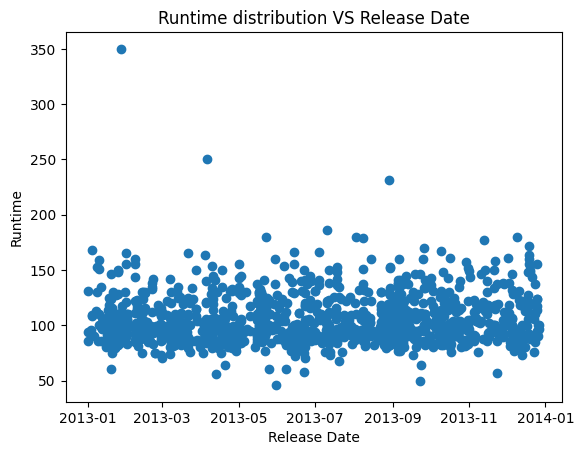

In [23]:
pyplot.title('Runtime distribution VS Release Date')
pyplot.xlabel('Release Date')
pyplot.ylabel('Runtime')
pyplot.scatter(imdb['release_date'], imdb['runtime'])
pyplot.show()

In [24]:
#Identify the top outliers for Runtime
imdb.sort_values("runtime", ascending = False).head()

,_id,id,title,runtime,user_rating,votes,mpaa_rating,release_date,budget,opening_weekend,gross_sales,genres,cast,director,producer,company
892,6528a2e7e7a225fedb911a46,3526810,Adolf Hitler: The Greatest Story Never Told,350,7.2,5744,NaN,2013-01-27,NaN,NaN,NaN,"Documentary, Biography, History, War","Eva Braun, Winston Churchill, Charles de Gaull...",Dennis Wise,Dennis Wise,TruthWillOut Films
772,6528a2e7e7a225fedb911a05,2852432,"Norte, the End of History",250,7.5,2024,TV-MA,2013-04-06,NaN,NaN,NaN,"Crime, Drama","Sid Lucero, Archie Alemania, Angeli Bayani, Ma...",Lav Diaz,"Kristine Kintana, Raymond Lee, Maya Quirino, J...","Wacky O Productions, Kayan Productions, Origin..."
1016,6528a2e7e7a225fedb911b21,1998204,Home from Home: Chronicle of a Vision,231,7.9,1446,Not Rated,2013-08-29,8000000.0,NaN,NaN,"Drama, History","Jan Dieter Schneider, Antonia Bill, Maximilian...",Edgar Reitz,"Michael André, Roman Klink, Margaret Ménégoz, ...","Edgar Reitz Film, Les Films du Losange, ARD De..."
132,6528a2e6e7a225fedb911882,2356180,Bhaag Milkha Bhaag,186,8.2,67061,Not Rated,2013-07-11,410000000.0,NaN,NaN,"Biography, Drama, Sport","Farhan Akhtar, Japtej Singh, Divya Dutta, Pawa...",Rakeysh Omprakash Mehra,"P.S. Bharathi, Jyoti Kapur Das, Maitreyee Dasg...","Rakeysh Omprakash Mehra Pictures, Viacom18 Mot..."
490,6528a2e7e7a225fedb911955,2322641,The Turning,180,5.8,1430,R,2013-08-03,NaN,NaN,NaN,Drama,"Colin Friels, James Fraser, Henri Phillips, Ni...","Jonathan auf der Heide, Tony Ayres, Jub Clerc,...","Alex Barnes, Alexis Bishop, Philippa Campey, D...","Arenamedia, Screen Australia"


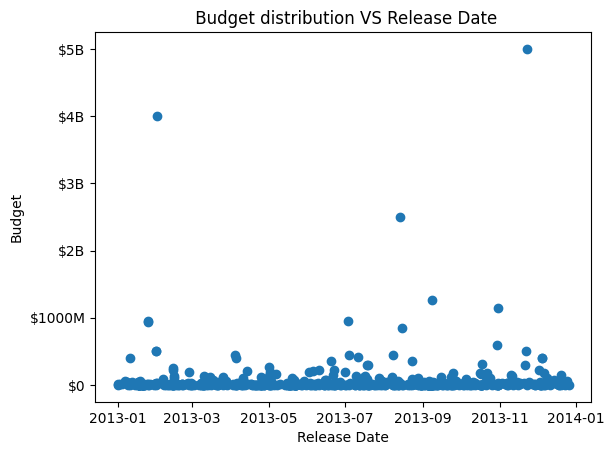

In [25]:
pyplot.title(' Budget distribution VS Release Date')
pyplot.xlabel('Release Date')
pyplot.ylabel('Budget')
pyplot.scatter(imdb['release_date'], imdb['budget'])
pyplot.gca().yaxis.set_major_formatter(format_currency)
pyplot.show()

In [26]:
#Identify top outliers for budget
imdb.sort_values("budget", ascending = False).head()

,_id,id,title,runtime,user_rating,votes,mpaa_rating,release_date,budget,opening_weekend,gross_sales,genres,cast,director,producer,company
275,6528a2e6e7a225fedb9117d7,2576852,The Tale of The Princess Kaguya,137,8.0,45621,PG,2013-11-23,5.000000e+09,NaN,25170399.0,"Animation, Drama, Family, Fantasy","Aki Asakura, Kengo Kôra, Takeo Chii, Nobuko Mi...",Isao Takahata,"Kôji Hoshino, Yoshiaki Nishimura, Seiichirô Uj...","Studio Ghibli, Dentsu, Hakuhodo DY Media Partn..."
1210,6528a2e7e7a225fedb911b5d,3127636,Scandal,102,3.6,1193,NaN,2013-02-01,4.000000e+09,NaN,NaN,"Comedy, Drama","Akbar Abdi, Elnaz Shakerdoost, Esmaeel Khalaj,...",Masoud Dehnamaki,Masoud Dehnamaki,", , , ,"
617,6528a2e7e7a225fedb911996,3155654,Hide and Seek,107,6.3,2013,Not Rated,2013-08-14,2.500000e+09,NaN,NaN,"Action, Horror, Mystery, Thriller","Kim Hye-Yoon, Son Hyeon-ju, Mi-seon Jeon, Moon...",Jung Huh,Mi-hee Kim,Studio Dream Capture
820,6528a2e7e7a225fedb911916,2215077,Half of a Yellow Sun,111,6.0,1989,R,2013-09-08,1.270000e+09,NaN,NaN,"Drama, Romance","Thandiwe Newton, Chiwetel Ejiofor, Anika Noni ...",Biyi Bandele,"Muhtar Bakare, Mark Birmingham, Andrea Calderw...","Slate Films, Shareman Media, British Film Inst..."
608,6528a2e7e7a225fedb911960,1029231,Krrish 3,152,5.3,22825,Not Rated,2013-10-31,1.150000e+09,NaN,NaN,"Action, Adventure, Sci-Fi","Hrithik Roshan, Vivek Oberoi, Priyanka Chopra ...",Rakesh Roshan,"Naman Chouhan, Rengarajan Jaiprakash, Rakesh R...","Film Kraft, Redchillies.VFX"


In regards to runtime, outliers are throwing off some of the movies and episodes, while others resemble exceptionally lengthy documentary films. A filter that can distinguish between episodes and standalone movies can aid in the identification of genuine outliers. In the plots, we can see the data is far away and seperated from the majority of the data. Regarding budget, I recommend implementing a filter based on the currency code. This filter can be used to retrieve data and create an additional field that enables currency conversion, aligning budgets with the year of release for currency. This adjustment ensures a more accurate and meaningful comparison of budgets across different timeframes.